In [1]:
import numpy as np
import random
from IPython import display
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Упражнение 1

На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.  
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. 
* Используйте функцию `z = 2*x**2 + 4*y`
* Перемножение матриц размера n на n

In [3]:
# Используйте функцию z = 2*x**2 + 4*y
def python(size_of_vec):
    start = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [2 * X[i] ** 2 + 4 * Y[i] for i in range(len(X))]
    return time.time() - start

def numpy(size_of_vec):
    start = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = 2 * X ** 2 + 4 * Y
    return time.time() - start


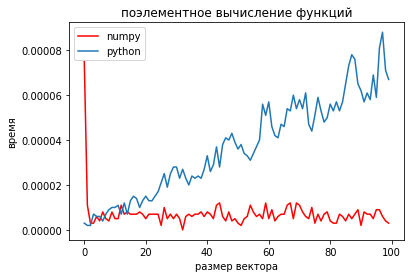

In [4]:
tim1 = []
tim2 = []

for N in np.arange(100):
    a=[]
    b=[]
    for j in np.arange(1000):
        a.append(numpy(N))
        b.append(python(N))
    tim1.append(sum(a)/len(a))
    tim2.append(sum(b)/len(b))   
    
plt.plot(tim1, color="red", label="numpy")
plt.plot(tim2, label="python")
plt.legend()
plt.xlabel("размер вектора")
plt.ylabel("время")
plt.title("поэлементное вычисление функций")
plt.show()


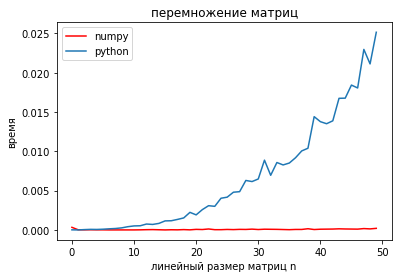

In [5]:
# Перемножение матриц размера n на n
def python(M):
    start = time.time()
    matrix1 = [[random.randint(0,10) for y in range(M)] for x in range(M)]
    matrix2 = [[random.randint(0,10) for y in range(M)] for x in range(M)]
    s=0
    matrix3 = [[]]
    for z in range (0,M):
        for j in range (0,M):
            t = []
            for i in range (0,M):
                s=s + matrix1[z][i] + matrix2[i][j]
            t.append(s)
            s=0
        matrix3.append(t)
        t=[]
    return time.time() - start

def numpy(N):
    start = time.time()
    X = np.random.randint(0,10,size=(N, N))
    Y = np.random.randint(0,10,size=(N, N))
    Z = X.dot(Y)
    return time.time() - start

tim1 = []
tim2 = []

for N in np.arange(50):
    a=[]
    b=[]
    for j in np.arange(100):
        a.append(numpy(N))
        b.append(python(N))
    tim1.append(sum(a)/len(a))
    tim2.append(sum(b)/len(b))   
    
plt.plot(tim1, color="red", label="numpy")
plt.plot(tim2, label="python")
plt.legend()
plt.xlabel("линейный размер матриц n")
plt.ylabel("время")
plt.title("перемножение матриц")
plt.show()


### Упражнение 2
* Создайте массив чисел от 2 до 75. Выведите только нечётные. 
* Присвойте нечётным числам этого массива значение -1.



In [6]:
a = np.arange(2,76)
print(*[i for i in a if i %2 ==1])
np.where(a%2==1, -1,a)

3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75


array([ 2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, -1, 34, -1,
       36, -1, 38, -1, 40, -1, 42, -1, 44, -1, 46, -1, 48, -1, 50, -1, 52,
       -1, 54, -1, 56, -1, 58, -1, 60, -1, 62, -1, 64, -1, 66, -1, 68, -1,
       70, -1, 72, -1, 74, -1])

### Упражнение 3

* Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. 
* Приведите примеры использования.

In [7]:
b = np.arange(5)
print(b)
c = np.arange(4)
print(c)
d = np.delete(b, c)
d

[0 1 2 3 4]
[0 1 2 3]


array([4])

### Упражнение 4

* Создайте случайную квадратную матрицу случайного размера от 10 до 100. 
* Найдите максимум и сумму элементов.
* Поделите каждый элемент матрицы на максимум.
* Отнимите от каждой строки матрицы среднее по строке.
* Замените максимальное значение на -1.

In [27]:
s = np.random.randint(10, 101)
A = np.random.randint(0, 101, size=(s, s))
print(A.max()) #максимум
print(A.sum()) # сумма элементов
A[:]/A.sum() # деление каждого элемента на максимум
A[::1][:]-A[::1][:].mean(axis = 1) # Отнимите от каждой строки матрицы среднее по строке
A[A == A.max()] = -1 #Замените максимальное значение на -1.
A

100
311995


array([[70, 77, 80, ..., 94, 92, 86],
       [71, 60,  9, ..., 58, 58, 19],
       [59, 74, 99, ..., 77, 45, 21],
       ...,
       [62, 16, 66, ..., 38, 41, 68],
       [55, 12, 87, ...,  6, 32,  0],
       [58, 86,  7, ..., -1, -1, 13]])

### Упражнение 5
* Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [10]:
def rep_aver_null(a):
    if np.isnan(a).all():
        a[:] = 0
    else:
        nan_a = np.isnan(a)
        val_a = (nan_a == False)
        aver = a[val_a].mean()
        a[nan_a] = aver
    return a

In [30]:
B = np.random.random(10)
B[:3] = np.nan
B

array([       nan,        nan,        nan, 0.07397405, 0.74059866,
       0.47748675, 0.18484614, 0.04082169, 0.17996648, 0.96669415])

In [31]:
rep_aver_null(B)

array([0.38062685, 0.38062685, 0.38062685, 0.07397405, 0.74059866,
       0.47748675, 0.18484614, 0.04082169, 0.17996648, 0.96669415])

### Упражнение 6
* Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [13]:
def norm_np_array(a):
    a = a/a.max()
    return(a)

In [14]:
B = np.random.randint(10, 100,(5,5))
B

array([[84, 12, 54, 37, 87],
       [69, 23, 47, 67, 64],
       [12, 46, 36, 35, 32],
       [51, 29, 61, 29, 21],
       [71, 97, 23, 12, 94]])

In [15]:
norm_np_array(B)

array([[0.86597938, 0.12371134, 0.55670103, 0.3814433 , 0.89690722],
       [0.71134021, 0.2371134 , 0.48453608, 0.69072165, 0.65979381],
       [0.12371134, 0.4742268 , 0.37113402, 0.36082474, 0.32989691],
       [0.5257732 , 0.29896907, 0.62886598, 0.29896907, 0.21649485],
       [0.73195876, 1.        , 0.2371134 , 0.12371134, 0.96907216]])

### Упражнение 7
* Запишите numpy-array в файл.
* Считайте numpy-array из файла.

In [18]:
array_50 = np.arange(50)
np.save('array_50', array_50)
b = np.load('array_50.npy')
print(array_50)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


### Упражнение 8
* Создайте случайный массив
* Найдите в массиве элемент ближайший к данному

In [19]:
a = np.random.randint(0, 100, size = 10) # случайный массив  
print(a) 
ran = np.random.randint(0, 100) # Случайное число
print(ran)
ind = (np.abs(a-ran)).argmin() #элемент  ближайший к данному
print(a[ind])


[58 79 18 92 92 32  1 39 82 34]
84
82


### Упражнение 9

* Напишите функцию, которая возвращает  $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [20]:
def matr_n_m_out_ins(n, m, out, ins): # матрица n×m, out - с заданным значением на границах матрицы, ins - с заданным значением внутри
    A = np.full((n,m),ins) 
    A[0, ] = out
    A[:, -1] = out
    A[-1, ] = out
    A[:, 0] = out
    return A

In [21]:
matr_n_m_out_ins(5, 5, 1, 0)

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

### Упражнение 10
* Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания. 

In [22]:
def matr_sort_col_asc(A, col):
    sort_matr = A[A[:, col].argsort()[::-1]]
    return sort_matr


In [23]:
B = np.random.randint(10, 100,(10,10))
B

array([[17, 98, 90, 33, 89, 81, 29, 31, 91, 10],
       [99, 70, 66, 79, 80, 94, 55, 59, 91, 53],
       [45, 38, 95, 24, 70, 12, 84, 49, 35, 70],
       [93, 31, 63, 36, 20, 56, 80, 15, 15, 81],
       [11, 83, 48, 12, 50, 17, 27, 93, 61, 64],
       [35, 45, 62, 16, 71, 87, 18, 22, 85, 85],
       [17, 65, 84, 45, 55, 76, 45, 97, 74, 55],
       [94, 25, 19, 60, 12, 66, 67, 37, 73, 74],
       [19, 80, 78, 98, 33, 90, 73, 14, 32, 38],
       [85, 59, 72, 74, 71, 65, 43, 94, 65, 53]])

In [24]:
matr_sort_col_asc(B, 0)

array([[99, 70, 66, 79, 80, 94, 55, 59, 91, 53],
       [94, 25, 19, 60, 12, 66, 67, 37, 73, 74],
       [93, 31, 63, 36, 20, 56, 80, 15, 15, 81],
       [85, 59, 72, 74, 71, 65, 43, 94, 65, 53],
       [45, 38, 95, 24, 70, 12, 84, 49, 35, 70],
       [35, 45, 62, 16, 71, 87, 18, 22, 85, 85],
       [19, 80, 78, 98, 33, 90, 73, 14, 32, 38],
       [17, 65, 84, 45, 55, 76, 45, 97, 74, 55],
       [17, 98, 90, 33, 89, 81, 29, 31, 91, 10],
       [11, 83, 48, 12, 50, 17, 27, 93, 61, 64]])

### Упражнение 11

* Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

Пример 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

In [25]:
def matr_chess(n):
    A = np.zeros((n, n))
    A[::2, 1::2] = 1
    A[1::2, ::2] = 1
    return A


In [26]:
matr_chess(8)

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

### Упражнение 12
* Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
* Визуализируйте интерактивно ее результаты.

